# Student Habits vs Academic Performance

### 1. Primeiro contato com os dados

In [1]:
import pandas as pd
df = pd.read_csv('student_habits_performance.csv')
df.head(10)
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [2]:
print(df.isnull().sum())

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


1. Quais colunas temos?
O dataset contém informações sobre os hábitos e características dos estudantes. Algumas das colunas são:
- Identificação e perfil: student_id, age, gender, parental_education_level
- Hábitos e rotina: study_hours_per_day, social_media_hours, netflix_hours, sleep_hours, exercise_frequency
- Condições externas: part_time_job, internet_quality, diet_quality, mental_health_rating
- Desempenho acadêmico: attendance_percentage, exam_score
2. Quais são numéricas? Quais são categóricas?
- Colunas numéricas (valores quantitativos):
- age, study_hours_per_day, social_media_hours, netflix_hours, attendance_percentage, sleep_hours, exercise_frequency, exam_score, mental_health_rating
- Colunas categóricas (valores qualitativos):
- student_id (único para cada aluno), gender, parental_education_level, internet_quality, diet_quality, part_time_job, extracurricular_participation
3. Há valores faltantes?
Sim, Apenas a coluna:
- parental_education_level → 91 valores nulos



### 2.  Hábitos e comportamento em números

<Axes: >

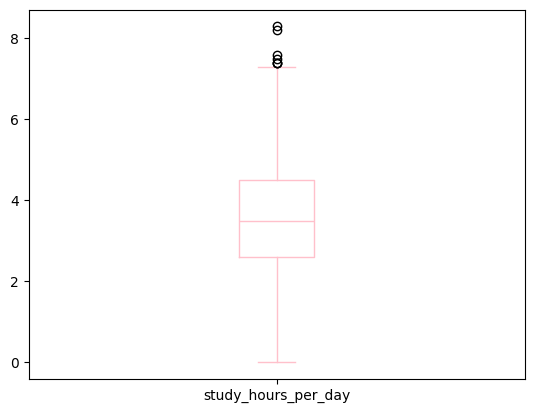

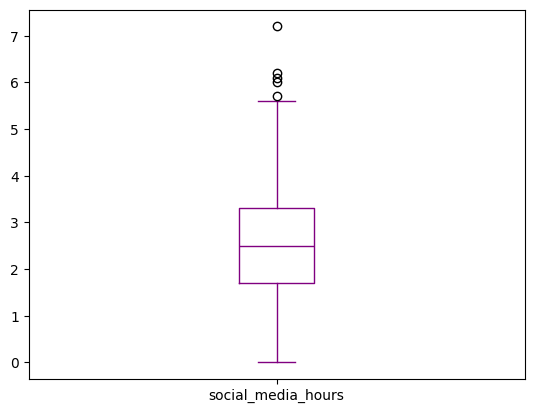

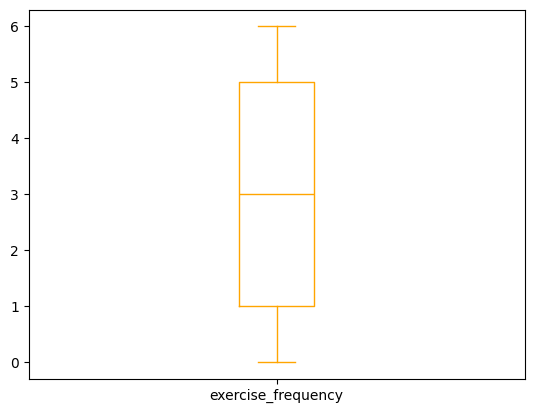

In [13]:
df.plot.box(y='study_hours_per_day', color='pink')
df.plot.box(y='social_media_hours', color='purple')
df.plot.box(y='exercise_frequency', color='orange')


1. Outliers
- Horas de Estudo por Dia: Existem alguns valores muito altos, indicando que alguns estudantes estudam bem mais que a maioria.
- Horas em Redes Sociais: Também há valores extremos no uso de redes sociais, sugerindo que alguns estudantes passam muito mais tempo conectados do que a média.
- Frequência de Exercícios: Alguns estudantes têm uma rotina de exercícios excepcionalmente alta ou baixa.

Os outliers podem indicar comportamentos extremos. Um estudante que estuda 10 horas por dia ou outro que usa redes sociais por mais de 6 horas podem ter um estilo de vida bastante diferente do restante.

2. Mediana
A mediana indica onde os dados se concentram, ou seja, o valor central da distribuição:
- Horas de Estudo por Dia: A maioria dos estudantes estuda cerca de 3 a 4 horas por dia.
- Horas em Redes Sociais: O uso típico está entre 2 e 3 horas por dia.
- Frequência de Exercícios: A mediana sugere que a maioria dos alunos pratica exercícios entre 3 e 5 vezes por semana.

A média de estudo diário não é excessiva, enquanto o uso de redes sociais pode estar próximo da média global. A prática de exercícios varia bastante, mas há um padrão moderado na maioria.

3. Distribuição dos Dados (Assimetria)
- Horas de Estudo: indica que há poucos estudantes que estudam muito acima da média, mas a maioria tem uma rotina equilibrada.
- Redes Sociais: Apresenta uma distribuição quase simétrica, ou seja, sem grande concentração em um lado.
- Frequência de Exercícios: A distribuição pode estar concentrada em valores mais baixos, indicando que alguns estudantes fazem exercícios raramente.

Os padrões de estudo e redes sociais são relativamente equilibrados, mas algumas pessoas apresentam hábitos atípicos.


Existem outliers em estudo, redes sociais e exercícios.
A mediana mostra um padrão de estudo e lazer moderado na maioria.
A distribuição dos dados confirma que há comportamentos típicos e extremos.


### 3. Como os comportamentos se distribuem?

<Axes: ylabel='Frequency'>

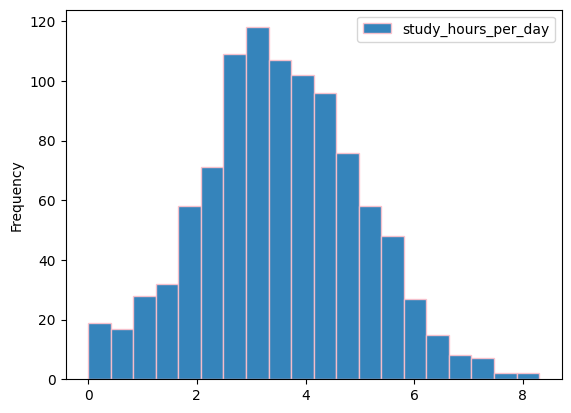

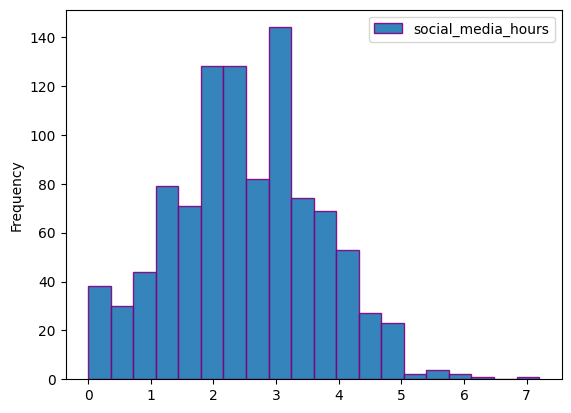

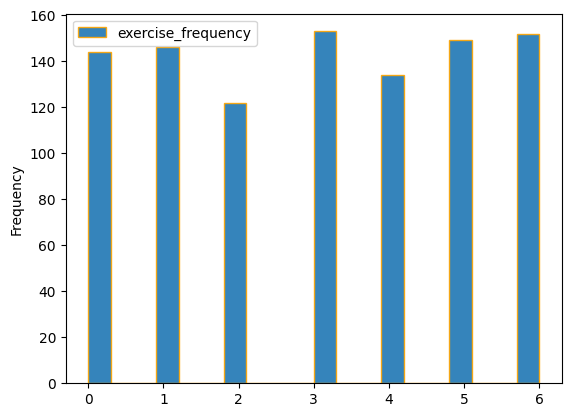

In [18]:
df.plot.hist(y='study_hours_per_day', bins=20, alpha=0.9, edgecolor='pink')
df.plot.hist(y='social_media_hours', bins=20, alpha=0.9, edgecolor='purple')
df.plot.hist(y='exercise_frequency', bins=20, alpha=0.9, edgecolor='orange')

<Axes: ylabel='Density'>

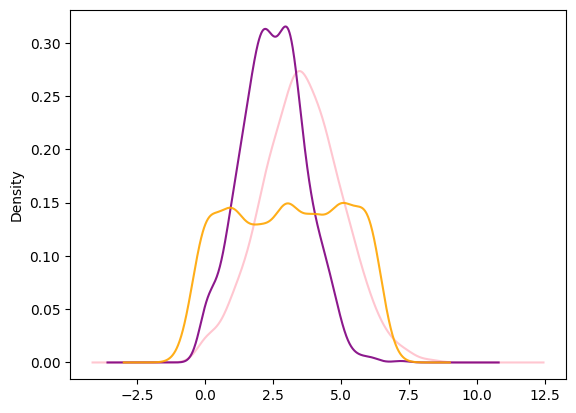

In [9]:
df['study_hours_per_day'].plot.kde(color='pink', label='study_hours_per_day', alpha=0.9)
df['social_media_hours'].plot.kde(color='purple', label='social_media_hours', alpha=0.9)
df['exercise_frequency'].plot.kde(color='orange', label='exercise_frequency', alpha=0.9)

- O histograma mostra valores exatos por intervalo (bins). Dependendo do número de bins, os dados podem parecer mais dispersos ou agrupados. Ideal para valores específico e frequência.
- O gráfico de densidade destaca picos e tendências gerais, sem separar em intervalos fixos. Ideal para observar a tendência geral dos dados.
- Trocando os bins no histograma (bins=2 vs. bins=20), podemos ver como a granularidade afeta a interpretação. Com poucos bins, temos menos detalhes; com muitos, vemos mais variação.


### 4. Exploração

<Axes: xlabel='study_hours_per_day', ylabel='exam_score'>

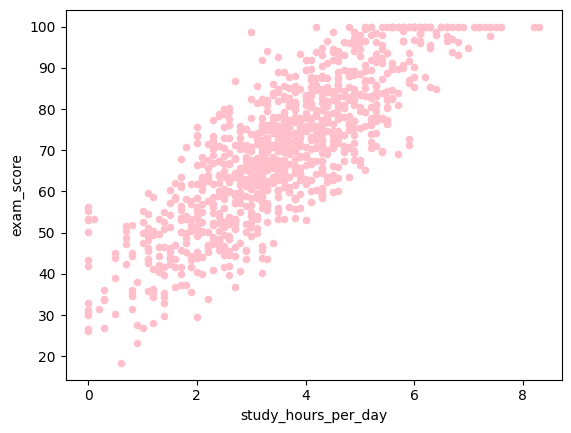

In [4]:
from matplotlib.pyplot import plot
df.plot.scatter(x='study_hours_per_day', y='exam_score', color='pink')


À medida que os alunos dedicam mais tempo ao estudo, suas notas tendem a aumentar. Isso sugere que um hábito consistente de estudo pode contribuir diretamente para um melhor desempenho acadêmico.
Porém, vale notar que há pontos dispersos, indicando que estudar muitas horas nem sempre garante um bom resultado. Outros fatores, como qualidade do estudo, métodos de aprendizado e nível de concentração, também influenciam os resultados.


### Hipótese livre

- Hipótese: A prática regular de exercícios físicos melhora o desempenho acadêmico dos alunos, não apenas pela saúde física, mas também pelo impacto positivo na cognição e na capacidade de concentração.

- Explicação: Quando um aluno pratica atividades físicas com frequência, seu cérebro recebe um fluxo maior de oxigênio e nutrientes, favorecendo a memória, criatividade e foco. Além disso, exercícios liberam neurotransmissores como dopamina e serotonina, que reduzem o estresse e ajudam a manter um estado mental mais equilibrado, essencial para o aprendizado.
